In [63]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import requests
import geopandas as gpd
%matplotlib inline

### Let's start by loading the Excel spreadsheets into pandas DataFrames. 

In [64]:
data_path = './Data'
#act = pd.read_excel(f'{data_path}/ACT.xlsx')
#act_disag = pd.read_excel(f'{data_path}/ACT_DESAGREGADO.xlsx')
#adherence = pd.read_excel(f'{data_path}/Adherencia.xlsx')
#familiar_records = pd.read_excel(f'{data_path}/Antecedentes_familiares.xlsx')
#pathological_records = pd.read_excel(f'{data_path}/Antecedentes_patologicos.xlsx')
#diagnostics_aids = pd.read_excel(f'{data_path}/Ayudas_diagnosticas.xlsx')
#biologics_asthma = pd.read_excel(f'{data_path}/Biologicos Asma.xlsx')
#life_quality = pd.read_excel(f'{data_path}/Calidad de vida relacioada en salud.xlsx')
basic_info = pd.read_excel(f'{data_path}/Datos basicos.xlsx')
#dyspnea = pd.read_excel(f'{data_path}/Disnea.xlsx')
#ram_pharmacovigilance = pd.read_excel(f'{data_path}/Farmacovigilancia RAM.xlsx')
#habits = pd.read_excel(f'{data_path}/Habitos.xlsx')
#hospitalizations = pd.read_excel(f'{data_path}/Hospitalizaciones.xlsx')
#collecting_issues = pd.read_excel(f'{data_path}/Incosistencias en reclamacion.xlsx')
#medicines = pd.read_excel(f'{data_path}/Medicamentos.xlsx')
#height_weight = pd.read_excel(f'{data_path}/Mediciones de peso y talla.xlsx')
#emergencies = pd.read_excel(f'{data_path}/Urgencias.xlsx')
#vaccines = pd.read_excel(f'{data_path}/Vacunacion.xlsx')

### Basic personal data

In [65]:
basic_info.head()

(872, 17)

In [66]:
#basic_info.columns = ['id_paciente', 'edad', 'genero', 'escolaridad', 'estado_civil', 'preferecncia_sexual', 'departamento', 'ciudad', 'estrato_social', 'zona', 'acompanante', 'nivel_socioeconomico', 'ocupacion', 'regimen', 'tipo_afiliacion', 'relacion_laboral', 'fecha_nacimiento']
basic_info.columns = [col.lower() for col in basic_info.columns]
basic_info.rename(columns={
    'id': 'id_paciente',
    'estadocivil': 'estado_civil',
    'preferencia': 'orientacion_sexual',
    'estrato': 'estrato_social',
    'acompaã±ante': 'acompanante',
    'nivelsocioeconomico': 'nivel_socioeconomico',
    'tipoafiliacion': 'tipo_afiliacion',
    'relacionlaboral': 'relacion_laboral',
    'fe_nacimiento': 'fecha_nacimiento'    
}, inplace=True)
basic_info.head()
basic_info.shape

(872, 17)

In [67]:
basic_info['regimen'].unique()

array(['CONTRIBUTIVO', 'SUBSIDIADO', nan, 'PARTICULAR', 'OTRO'],
      dtype=object)

In [68]:
basic_info['genero'] = basic_info['genero'].astype('category')
basic_info['escolaridad'] = basic_info['escolaridad'].astype('category')
basic_info['escolaridad'].cat.reorder_categories(['ANALFABETA', 'EDAD PREESCOLAR', 'PRIMARIA', \
                                                  'SECUNDARIA', 'TECNICO', 'TECNOLOGO', 'UNIVERSITARIO', \
                                                  'POSGRADO'], ordered=True, inplace=True)
basic_info['estado_civil'] = basic_info['estado_civil'].astype('category')
basic_info['orientacion_sexual'] = basic_info['orientacion_sexual'].astype('category')
basic_info['zona'] = basic_info['zona'].astype('category')
basic_info['nivel_socioeconomico'] = basic_info['nivel_socioeconomico'].astype('category')
basic_info['nivel_socioeconomico'].cat.reorder_categories(['NIVEL 0 DEL SISBEN', 'NIVEL 1 DEL SISBEN', \
                                                           'NIVEL 2 DEL SISBEN', 'A', 'B', 'C'], \
                                                          ordered=True, inplace=True)
basic_info['ocupacion'] = basic_info['ocupacion'].astype('category')
basic_info['regimen'] = basic_info['regimen'].astype('category')
basic_info['tipo_afiliacion'] = basic_info['tipo_afiliacion'].astype('category')
basic_info['relacion_laboral'] = basic_info['relacion_laboral'].astype('category')
basic_info['fecha_nacimiento'] = pd.to_datetime(basic_info['fecha_nacimiento'])

In [69]:
basic_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 17 columns):
id_paciente             888 non-null int64
edad                    887 non-null float64
genero                  886 non-null category
escolaridad             877 non-null category
estado_civil            878 non-null category
orientacion_sexual      202 non-null category
departamento            886 non-null object
ciudad                  886 non-null object
estrato_social          887 non-null float64
zona                    887 non-null category
acompanante             861 non-null object
nivel_socioeconomico    871 non-null category
ocupacion               861 non-null category
regimen                 861 non-null category
tipo_afiliacion         861 non-null category
relacion_laboral        861 non-null category
fecha_nacimiento        887 non-null datetime64[ns]
dtypes: category(10), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 59.3+ KB


In [70]:
basic_info.describe(include='all')

,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
count,8.880000e+02,887.000000,886,877,878,202,886,886,887.000000,887,861,871,861,861,861,861,887
unique,NaN,NaN,2,8,6,3,12,52,NaN,2,10,6,8,4,3,5,859
top,NaN,NaN,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,NaN,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,2004-05-12 00:00:00
freq,NaN,NaN,617,390,420,192,703,470,NaN,853,531,637,463,837,536,477,3
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1932-04-05 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-04 00:00:00
mean,1.259328e+06,40.839910,NaN,NaN,NaN,NaN,NaN,NaN,2.985344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.326579e+05,18.356553,NaN,NaN,NaN,NaN,NaN,NaN,0.867529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5.005470e+05,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.900988e+05,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
basic_info.drop_duplicates(inplace=True)

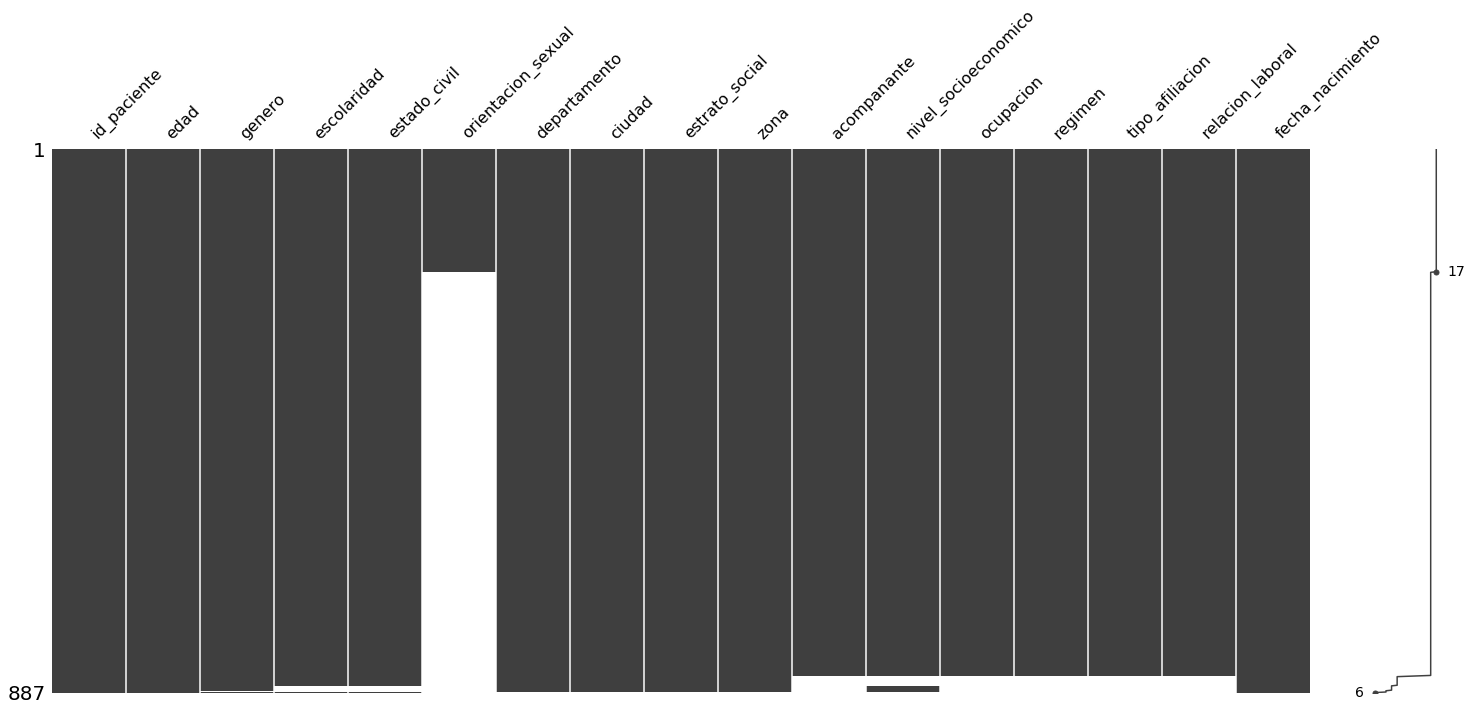

In [72]:
msno.matrix(msno.nullity_sort(basic_info, sort='descending'))

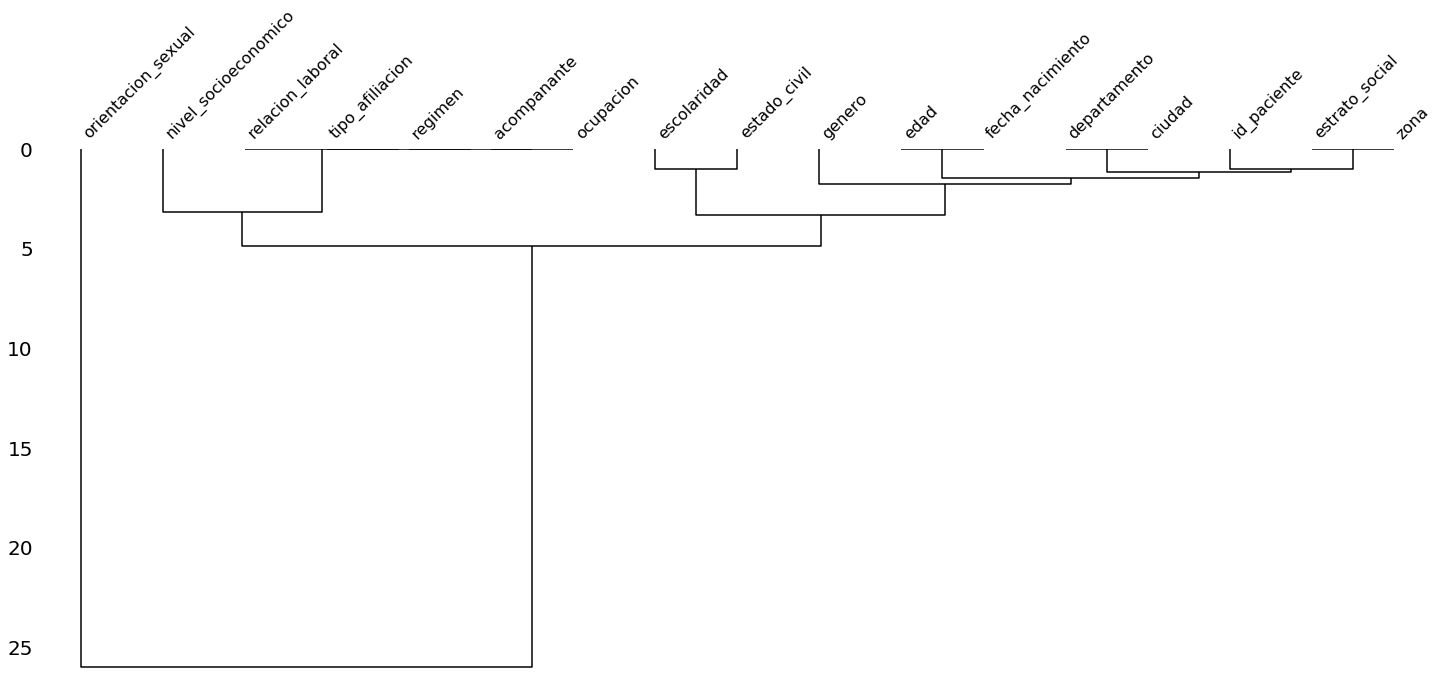

In [73]:
msno.dendrogram(basic_info)

In [74]:
basic_info.groupby('genero').count()

,id_paciente,edad,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
genero,,,,,,,,,,,,,,,,
F,616,615,609,610,145,614,614,615,615,599,605,599,599,599,599,615
M,269,269,267,267,56,269,269,269,269,261,263,261,261,261,261,269


In [75]:
basic_info.groupby('zona').count()

,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
zona,,,,,,,,,,,,,,,,
RURAL,34,34,34,34,34,8,34,34,34,33,33,33,33,33,33,34
URBANA,852,851,850,841,842,193,851,851,852,827,837,827,827,827,827,851


/home/sebasmos/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:385: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds


[Text(0.5, 0, 'Age')]

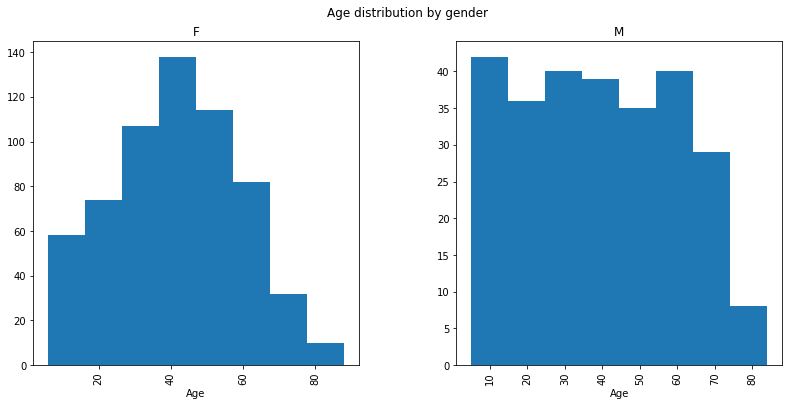

In [76]:
fig, ax = plt.subplots(figsize=(13,6))
chart_axes = basic_info[['edad','genero']].hist(by='genero', bins=8, ax=ax)
fig.suptitle("Age distribution by gender")
chart_axes[0].set(xlabel="Age")
chart_axes[1].set(xlabel="Age")

Text(0.5, 0, 'Social stratum classification')

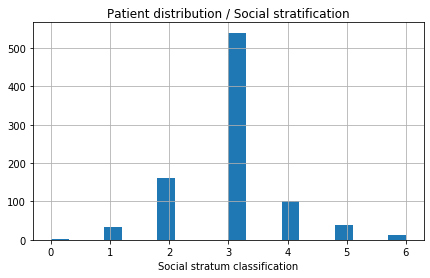

In [77]:
plt.figure(figsize=(7,4))
basic_info['estrato_social'].hist(bins=20)
plt.title("Patient distribution / Social stratification")
plt.xlabel("Social stratum classification")

In [78]:
count_per_mpio = basic_info[['id_paciente', 'ciudad']].groupby('ciudad').count().reset_index()
count_per_mpio.head()

,ciudad,id_paciente
0,ANDES,1
1,ANTIOQUIA,5
2,ARMENIA,4
3,BARBOSA,1
4,BARRANQUILLA,48


In [79]:
basic_info.loc[basic_info['ciudad']=='BOGOTA', 'departamento'] = 'SANTAFE DE BOGOTA D.C'

In [80]:
basic_info.loc[basic_info['departamento']=='MEDELLIN', 'departamento'] = 'ANTIOQUIA' # MEDELLIN -> ANTIOQUIA
basic_info.loc[basic_info['departamento']=='PEREIRA', 'departamento'] = 'RISARALDA' # PEREIRA -> RISARALDA
basic_info.loc[basic_info['departamento']=='VALLE', 'departamento'] = 'VALLE DEL CAUCA' # VALLE -> VALLE DEL CAUCA

count_per_depto = basic_info[['id_paciente', 'departamento']].groupby('departamento').count().reset_index()
count_per_depto.columns = ['departamento', 'count_pacientes']
count_per_depto['percentage'] = (count_per_depto['count_pacientes'] / sum(count_per_depto['count_pacientes']))*100
count_per_depto.sort_values(by='count_pacientes', ascending=False).set_index('departamento')

,count_pacientes,percentage
departamento,,
ANTIOQUIA,709,80.112994
ATLANTICO,53,5.988701
VALLE DEL CAUCA,36,4.067797
SANTAFE DE BOGOTA D.C,34,3.841808
CALDAS,28,3.163842
RISARALDA,11,1.242938
CUNDINAMARCA,6,0.677966
QUINDIO,4,0.451977
BOLIVAR,2,0.225989


In [81]:
mpios_colombia_url = 'https://raw.githubusercontent.com/santiblanko/colombia.geojson/master/mpio.json'
deptos_colombia_url = 'https://raw.githubusercontent.com/santiblanko/colombia.geojson/master/depto.json'
coords = [7.1986, -75.3412]

In [82]:
deptos_gdf = gpd.read_file(deptos_colombia_url)
deptos_gdf.head()

,DPTO,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry
0,05,ANTIOQUIA,6.335186e+10,1963728.843,6335185.555,"POLYGON ((-76.30393 8.61651, -76.29474 8.61361..."
1,08,ATLANTICO,3.360765e+09,240936.172,336076.535,"POLYGON ((-74.86717 10.35843, -74.87297 10.340..."
2,11,SANTAFE DE BOGOTA D.C,1.650948e+09,323322.540,165094.778,"POLYGON ((-74.01949 4.79225, -74.02298 4.78075..."
3,13,BOLIVAR,2.614189e+10,1309427.968,2614189.453,"POLYGON ((-75.15608 10.42083, -75.15088 10.406..."
4,15,BOYACA,2.335258e+10,1364539.911,2335258.246,"POLYGON ((-72.20951 7.02466, -72.20261 7.02176..."


In [83]:
merge_count_deptos = deptos_gdf.merge(count_per_depto, how='left', left_on='NOMBRE_DPT', right_on='departamento')

In [84]:
m = folium.Map(
    location=coords,
    tiles='CartoDB positron',
    zoom_start=7  # Limited levels of zoom for free Mapbox tiles.
)

tooltip = folium.GeoJsonTooltip(
    fields=["NOMBRE_DPT", "count_pacientes"],
    aliases=["Departamento:", "Número pacientes:"],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)


# choropleth = folium.Choropleth(
#     geo_data=mpios_colombia_url,
#     name='choropleth',
#     data=count_per_mpio,
#     columns=['Ciudad', 'ID'],
#     key_on='feature.properties.NOMBRE_MPI',
#     nan_fill_color='white',
#     nan_fill_opacity=0.7,
#     fill_color='YlGn',
#     fill_opacity=0.9,
#     line_opacity=0.2,
#     highlight=True,
#     tooltip=tooltip,
#     legend_name='Count'
# ).add_to(m)

choropleth = folium.Choropleth(
    geo_data=merge_count_deptos,
    name='choropleth',
    data=count_per_depto,
    columns=['departamento', 'count_pacientes'],
    key_on='feature.properties.NOMBRE_DPT',
    nan_fill_color='white',
    nan_fill_opacity=0.7,
    fill_color='YlGn',
    fill_opacity=0.9,
    line_opacity=0.2,
    highlight=True,
    legend_name='Patient count per Department'
).add_to(m)

choropleth.geojson.add_child(
    tooltip
)

m

### Records with duplicate IDs 

In [85]:
duplicate_ids = basic_info[basic_info.duplicated('id_paciente')]['id_paciente']

In [86]:
for i in duplicate_ids:
    print(f'\nDuplicate rows for id_paciente {i}:')
    display(basic_info[basic_info['id_paciente'] == i])


Duplicate rows for id_paciente 715534:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
124,715534,NaN,F,NaN,SIN DEFINIR,NaN,ANTIOQUIA,MARINILLA,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,NaT
125,715534,19.0,F,SECUNDARIA,SOLTERO (A),NaN,ANTIOQUIA,MARINILLA,3.0,URBANA,NaN,NaN,NaN,NaN,NaN,NaN,2000-12-11



Duplicate rows for id_paciente 814670:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
179,814670,20.0,F,SECUNDARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,2000-02-10
180,814670,20.0,F,PRIMARIA,SOLTERO (A),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-02-21



Duplicate rows for id_paciente 960030:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
264,960030,18.0,M,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,1.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,INDEPENDIENTE,2001-11-02
265,960030,18.0,M,SECUNDARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2001-11-02



Duplicate rows for id_paciente 1008837:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
294,1008837,16.0,F,PRIMARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,INDEPENDIENTE,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,2004-05-12
295,1008837,16.0,F,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,FAMILIAR CERCANO,C,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2004-05-12
296,1008837,16.0,F,PRIMARIA,SOLTERO (A),NaN,NaN,NaN,3.0,URBANA,NaN,NaN,NaN,NaN,NaN,NaN,2004-05-12



Duplicate rows for id_paciente 1008837:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
294,1008837,16.0,F,PRIMARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,INDEPENDIENTE,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,2004-05-12
295,1008837,16.0,F,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,FAMILIAR CERCANO,C,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2004-05-12
296,1008837,16.0,F,PRIMARIA,SOLTERO (A),NaN,NaN,NaN,3.0,URBANA,NaN,NaN,NaN,NaN,NaN,NaN,2004-05-12



Duplicate rows for id_paciente 1022147:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
304,1022147,10.0,F,EDAD PREESCOLAR,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,MADRE,A,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2009-06-08
305,1022147,10.0,F,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,COPACABANA,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2009-06-08



Duplicate rows for id_paciente 1053118:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
325,1053118,19.0,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,LA ESTRELLA,3.0,URBANA,FAMILIAR CERCANO,A,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,2000-12-07
326,1053118,19.0,F,SECUNDARIA,SOLTERO (A),NaN,ANTIOQUIA,ITAGUI,2.0,URBANA,HERMANO(A),A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,2000-12-07



Duplicate rows for id_paciente 1118363:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
367,1118363,6.0,M,ANALFABETA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,FAMILIAR CERCANO,B,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2013-10-28
368,1118363,6.0,M,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,2.0,RURAL,NaN,NaN,NaN,NaN,NaN,NaN,2013-10-28



Duplicate rows for id_paciente 1226479:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
424,1226479,21.0,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,5.0,URBANA,PADRE,C,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,1998-11-22
425,1226479,21.0,F,SECUNDARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,5.0,URBANA,PACIENTE,B,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,1998-11-22



Duplicate rows for id_paciente 1269267:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
449,1269267,30.0,M,PRIMARIA,UNIÓN LIBRE,HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,SIN DEFINIR,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1989-08-20
450,1269267,30.0,M,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,2.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1989-08-20



Duplicate rows for id_paciente 1515210:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
593,1515210,14.0,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ATLANTICO,BARRANQUILLA,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2005-09-05
594,1515210,14.0,F,SECUNDARIA,SOLTERO (A),NaN,ATLANTICO,BARRANQUILLA,2.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2005-09-05



Duplicate rows for id_paciente 1571540:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
618,1571540,30.0,F,SECUNDARIA,CASADO (A),HETEROSEXUAL,BOLIVAR,CARTAGENA,2.0,URBANA,SIN DEFINIR,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1989-06-29
619,1571540,30.0,F,TECNICO,CASADO (A),HETEROSEXUAL,BOLIVAR,CARTAGENA,2.0,URBANA,SIN DEFINIR,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1989-06-29



Duplicate rows for id_paciente 1625263:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
652,1625263,9.0,F,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,BELLO,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2011-02-27
653,1625263,9.0,F,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,BELLO,3.0,URBANA,NaN,NaN,NaN,NaN,NaN,NaN,2011-02-27



Duplicate rows for id_paciente 1725068:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
720,1725068,9.0,F,EDAD PREESCOLAR,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2011-01-04
721,1725068,9.0,F,SECUNDARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,5.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2011-01-04



Duplicate rows for id_paciente 1750189:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
745,1750189,61.0,F,UNIVERSITARIO,CASADO (A),NaN,ATLANTICO,BARRANQUILLA,4.0,URBANA,PACIENTE,C,INDEPENDIENTE,CONTRIBUTIVO,BENEFICIARIO,INDEPENDIENTE,1959-02-21
746,1750189,61.0,F,UNIVERSITARIO,CASADO (A),NaN,ATLANTICO,BARRANQUILLA,4.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1959-02-21


There are records with duplicate ID but different values for the remaining fields:

* Some have complementary information (`R1.x = NaN` while `R1'.x = value`).
* Some have conflicting information (`R1.x = value1` while `R1'.x = value2`).

The strategy for combining duplicate rows is as follow:

* Replace `NaN` occurrences with actual values when available.
* In case of conflicting values pick the first value

In [87]:
def combine_df_rows(duplicate_rows_df):
    comb_df = pd.DataFrame(columns=duplicate_rows_df.columns)
    comb_row = {}
    for col in duplicate_rows_df.columns:
        non_null = duplicate_rows_df[duplicate_rows_df[col].notna()]
        #display(non_null)
        if non_null.shape[0] > 0:
            comb_row[col] = non_null.iloc[0][col]
    comb_df = comb_df.append(comb_row, ignore_index=True)
    return comb_df

#combine_df_rows(basic_info.iloc[[294,295,296]])

In [88]:
for i in duplicate_ids:
    #print(f'\nDuplicate rows for id_paciente {i}:')
    duplicate_rows_df = basic_info[basic_info['id_paciente'] == i]
    fixed_row = combine_df_rows(duplicate_rows_df)
    basic_info.iloc[duplicate_rows_df.index[0], :] = fixed_row.iloc[0]

In [89]:
for i in duplicate_ids:
    print(f'\nDuplicate rows for id_paciente {i}:')
    display(basic_info[basic_info['id_paciente'] == i])


Duplicate rows for id_paciente 715534:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
124,715534,19.0,F,SECUNDARIA,SIN DEFINIR,NaN,ANTIOQUIA,MARINILLA,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,2000-12-11
125,715534,19.0,F,SECUNDARIA,SOLTERO (A),NaN,ANTIOQUIA,MARINILLA,3.0,URBANA,NaN,NaN,NaN,NaN,NaN,NaN,2000-12-11



Duplicate rows for id_paciente 814670:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
179,814670,20.0,F,SECUNDARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,2000-02-10
180,814670,20.0,F,PRIMARIA,SOLTERO (A),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-02-21



Duplicate rows for id_paciente 960030:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
264,960030,18.0,M,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,1.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,INDEPENDIENTE,2001-11-02
265,960030,18.0,M,SECUNDARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2001-11-02



Duplicate rows for id_paciente 1008837:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
294,1008837,16.0,F,PRIMARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,INDEPENDIENTE,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,2004-05-12
295,1008837,16.0,F,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,FAMILIAR CERCANO,C,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2004-05-12
296,1008837,16.0,F,PRIMARIA,SOLTERO (A),NaN,NaN,NaN,3.0,URBANA,NaN,NaN,NaN,NaN,NaN,NaN,2004-05-12



Duplicate rows for id_paciente 1008837:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
294,1008837,16.0,F,PRIMARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,INDEPENDIENTE,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,2004-05-12
295,1008837,16.0,F,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,FAMILIAR CERCANO,C,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2004-05-12
296,1008837,16.0,F,PRIMARIA,SOLTERO (A),NaN,NaN,NaN,3.0,URBANA,NaN,NaN,NaN,NaN,NaN,NaN,2004-05-12



Duplicate rows for id_paciente 1022147:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
304,1022147,10.0,F,EDAD PREESCOLAR,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,MADRE,A,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2009-06-08
305,1022147,10.0,F,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,COPACABANA,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2009-06-08



Duplicate rows for id_paciente 1053118:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
325,1053118,19.0,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,LA ESTRELLA,3.0,URBANA,FAMILIAR CERCANO,A,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,2000-12-07
326,1053118,19.0,F,SECUNDARIA,SOLTERO (A),NaN,ANTIOQUIA,ITAGUI,2.0,URBANA,HERMANO(A),A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,2000-12-07



Duplicate rows for id_paciente 1118363:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
367,1118363,6.0,M,ANALFABETA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,FAMILIAR CERCANO,B,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2013-10-28
368,1118363,6.0,M,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,2.0,RURAL,NaN,NaN,NaN,NaN,NaN,NaN,2013-10-28



Duplicate rows for id_paciente 1226479:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
424,1226479,21.0,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,5.0,URBANA,PADRE,C,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,1998-11-22
425,1226479,21.0,F,SECUNDARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,5.0,URBANA,PACIENTE,B,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,1998-11-22



Duplicate rows for id_paciente 1269267:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
449,1269267,30.0,M,PRIMARIA,UNIÓN LIBRE,HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,SIN DEFINIR,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1989-08-20
450,1269267,30.0,M,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,2.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1989-08-20



Duplicate rows for id_paciente 1515210:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
593,1515210,14.0,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ATLANTICO,BARRANQUILLA,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2005-09-05
594,1515210,14.0,F,SECUNDARIA,SOLTERO (A),NaN,ATLANTICO,BARRANQUILLA,2.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2005-09-05



Duplicate rows for id_paciente 1571540:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
618,1571540,30.0,F,SECUNDARIA,CASADO (A),HETEROSEXUAL,BOLIVAR,CARTAGENA,2.0,URBANA,SIN DEFINIR,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1989-06-29
619,1571540,30.0,F,TECNICO,CASADO (A),HETEROSEXUAL,BOLIVAR,CARTAGENA,2.0,URBANA,SIN DEFINIR,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1989-06-29



Duplicate rows for id_paciente 1625263:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
652,1625263,9.0,F,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,BELLO,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2011-02-27
653,1625263,9.0,F,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,BELLO,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2011-02-27



Duplicate rows for id_paciente 1725068:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
720,1725068,9.0,F,EDAD PREESCOLAR,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2011-01-04
721,1725068,9.0,F,EDAD PREESCOLAR,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2011-01-04



Duplicate rows for id_paciente 1750189:


,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
745,1750189,61.0,F,UNIVERSITARIO,CASADO (A),NaN,ATLANTICO,BARRANQUILLA,4.0,URBANA,PACIENTE,C,INDEPENDIENTE,CONTRIBUTIVO,BENEFICIARIO,INDEPENDIENTE,1959-02-21
746,1750189,61.0,F,UNIVERSITARIO,CASADO (A),NaN,ATLANTICO,BARRANQUILLA,4.0,URBANA,PACIENTE,C,INDEPENDIENTE,CONTRIBUTIVO,BENEFICIARIO,INDEPENDIENTE,1959-02-21


In [90]:
basic_info.drop_duplicates('id_paciente', inplace=True)
basic_info.shape

(872, 17)

This way we have removed the duplicates from the `basic_info` dataset

### Dealing with inconsistencies in fields age (edad) / birthdate (fecha de nacimiento)

In [91]:
((basic_info['edad'] - ((2019 - basic_info['fecha_nacimiento'].dt.year))) > 1.0).any()

False

There are no major inconsistencies between the values on the age and birthdate fields.

### Dealing with inconsistencies in fields age (edad) / civil status (estado civil)

People under 15 y/o shouldn't not appear as being married or divorced:

In [92]:
conflict_vals = ['CASADO (A)', 'SEPARADO (A)', 'UNIÓN LIBRE', 'VIUDO (A)']

basic_info.loc[((basic_info['edad'] < 15) & (basic_info['estado_civil'].isin(conflict_vals)))]

,id_paciente,edad,genero,escolaridad,estado_civil,orientacion_sexual,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
195,846792,12.0,M,PRIMARIA,SEPARADO (A),NaN,ANTIOQUIA,MEDELLIN,2.0,URBANA,MADRE,A,ESTUDIANTE,SUBSIDIADO,BENEFICIARIO,MENOR NO LABORA,2007-07-16
213,883845,10.0,F,PRIMARIA,UNIÓN LIBRE,NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,PADRE,B,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2009-08-04
818,1892075,11.0,F,PRIMARIA,CASADO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2009-05-11
873,1980742,5.0,M,SECUNDARIA,CASADO (A),NaN,ANTIOQUIA,SABANETA,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,2014-07-04


In [93]:
basic_info.loc[((basic_info['edad'] < 15) & (basic_info['estado_civil'].isin(conflict_vals))), 'estado_civil'] = 'SOLTERO (A)'

### Dealing with inconsistencies in fields age (edad) / employment type - occupation (relación laboral - ocupación)

In Colombia (as in most countries) child labor is forbidden. Therefore under-age patients registered as `unemployed` (`SIN EMPLEO`) should be assigned to the right category for this case, which is `MENOR NO LABORA` (`under-age - does not work`)

In [94]:
basic_info.loc[basic_info['edad'] < 18, 'relacion_laboral'] = 'MENOR NO LABORA'

### Dealing with NaN values for categorical variables

Some categorical variables include explicitly the value '`Undefined`': `occupation` (`ocupacion`) and `civil status` (`estado civil`):

In [95]:
basic_info.loc[((basic_info['edad'] < 18) & (basic_info['ocupacion'] == 'EMPLEADO')), 'ocupacion'] = 'SIN DEFINIR'

In [96]:
basic_info.loc[basic_info['ocupacion'].isna(), 'ocupacion'] = 'SIN DEFINIR'

In [97]:
basic_info.loc[basic_info['estado_civil'].isna(), 'estado_civil'] = 'SIN DEFINIR'

The field regarding sexual orientation has only been provided by 199 out of the 872 patients (that only is 23% of the entire collection). We have chosen then to dismiss this field from the dataset.

In [98]:
basic_info.drop(columns=['orientacion_sexual'], inplace=True)

### Cleansed dataset:

In [99]:
basic_info.describe(include='all')

,id_paciente,edad,genero,escolaridad,estado_civil,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
count,8.720000e+02,872.000000,870,862,872,872,872,872.000000,872,850,860,872,850,850,852,872
unique,NaN,NaN,2,8,6,11,52,NaN,2,10,6,8,4,3,5,858
top,NaN,NaN,F,SECUNDARIA,SOLTERO (A),ANTIOQUIA,MEDELLIN,NaN,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1984-05-28 00:00:00
freq,NaN,NaN,604,384,410,699,464,NaN,839,527,629,457,826,532,471,2
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1932-04-05 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-04 00:00:00
mean,1.259526e+06,41.146789,NaN,NaN,NaN,NaN,NaN,2.983945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.343817e+05,18.222354,NaN,NaN,NaN,NaN,NaN,0.865047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5.005470e+05,5.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.887368e+05,27.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
basic_info.to_csv('./data/cleansed/datos_basicos.csv', sep='|')

In [50]:
basic_info.shape

(872, 17)